**Importing libraries**

In [0]:
%matplotlib inline
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import matplotlib.pyplot as plt
import numpy as np

**Loading MNIST data**

In [0]:
traindata=datasets.MNIST('/data',train=True,download=True,transform=transforms.ToTensor())
trainloader=torch.utils.data.DataLoader(traindata,batch_size=64,shuffle=True)

testdata=datasets.MNIST('/data',train=False,download=True,transform=transforms.ToTensor())
testloader=torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=True)

**Visualizing images**

In [0]:
images,_=next(iter(trainloader))

In [4]:
images[0].shape

torch.Size([1, 28, 28])

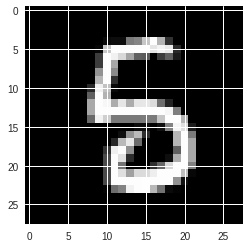

In [5]:
plt.imshow(images[60].reshape(28,28),cmap='gray')

**Autoencoder model**

In [0]:
class AutoEncoder(nn.Module):
  def __init__(self):
    super().__init__()
    
    #Encoder
    self.conv1=nn.Conv2d(1,16,3,padding=1)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(16,4,3,padding=1)
    
    self.upsample=nn.Upsample(scale_factor=2,mode='nearest')
    self.conv3=nn.Conv2d(4,16,3,padding=1)
    self.conv4=nn.Conv2d(16,1,3,padding=1)
    
    self.sigmoid=nn.Sigmoid()
    
  def forward(self,x):
    x=self.pool(self.conv1(x))
    x=self.pool(self.conv2(x))
    
    x=self.upsample(x)
    
    x=self.upsample(self.conv3(x))
    x=self.conv4(x)
    x=self.sigmoid(x)
    
    return x

**Optimization Objects**

In [0]:
model=AutoEncoder()
model.cuda()
criteria=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.003)

**Training**

In [8]:
epoch=30
for e in range(epoch):
  running_loss=0
  for images,_ in trainloader:
    images=images.cuda()
    
    optimizer.zero_grad()
    logits=model.forward(images)
    loss=criteria(logits,images)
    loss.backward()
    
    optimizer.step()
    
    running_loss+=loss.item()
  else:
    print('Training Loss : ',running_loss/len(trainloader))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


Training Loss :  0.01652283645542795
Training Loss :  0.00924559955252831
Training Loss :  0.008494658872727424
Training Loss :  0.00811422920462165
Training Loss :  0.007918281005079877
Training Loss :  0.007791780294782953
Training Loss :  0.007707927538367953
Training Loss :  0.0076347398919178475
Training Loss :  0.007581165612442916
Training Loss :  0.00750162413588036
Training Loss :  0.0074309979362893845
Training Loss :  0.007334017656000852
Training Loss :  0.007212257296192462
Training Loss :  0.0071403462427860895
Training Loss :  0.007077677888291349
Training Loss :  0.007042823766947968
Training Loss :  0.00702431104155873
Training Loss :  0.006990547938300158
Training Loss :  0.006977506811970841
Training Loss :  0.006970960288934076
Training Loss :  0.006959139457298145
Training Loss :  0.006952118196550495
Training Loss :  0.006943697059677957
Training Loss :  0.006947005498729376
Training Loss :  0.0069282012470344555
Training Loss :  0.0069300266844567965
Training Los

**Before Compression**

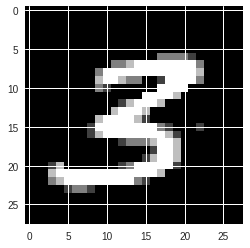

In [9]:
images,_=next(iter(testloader))
plt.imshow(images[0].reshape(28,28),cmap='gray')

**After Compression**

In [10]:
with torch.no_grad():
#     images=images.view(-1,784)
    images=images.cuda()
    comp_img=model.forward(images)
 

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


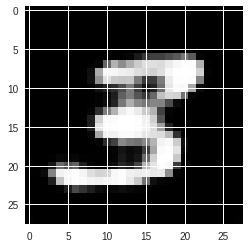

In [11]:
comp_img=comp_img.cpu()
plt.imshow(comp_img[0].reshape(28,28),cmap='gray')